In [2]:
import yt
import numpy as np
import yt.units as units
import pylab

/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [3]:
L=150
N=256
i=20

In [4]:
fname = f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/r1/snaps/snapdir_{i:03d}/snapshot_{i:03d}.0.hdf5"

In [5]:
fname = "/mnt/home/student/cprem/Downloads/GadgetDiskGalaxy/snapshot_200.hdf5"

unit_base = {'UnitLength_in_cm'         : 3.08568e+21,
             'UnitMass_in_g'            :   1.989e+43,
             'UnitVelocity_in_cm_per_s' :      100000}

bbox_lim = 1e5 #kpc

bbox = [[-bbox_lim,bbox_lim],
        [-bbox_lim,bbox_lim],
        [-bbox_lim,bbox_lim]]
 
ds = yt.load(fname,unit_base=unit_base,bounding_box=bbox)
ds.index
ad= ds.all_data()

yt : [INFO     ] 2021-03-08 23:10:17,584 Calculating time from 3.448e-01 to be 1.108e+17 seconds
yt : [INFO     ] 2021-03-08 23:10:17,628 Parameters: current_time              = 1.1075810732534829e+17 s
yt : [INFO     ] 2021-03-08 23:10:17,629 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-03-08 23:10:17,630 Parameters: domain_left_edge          = [-100000. -100000. -100000.]
yt : [INFO     ] 2021-03-08 23:10:17,631 Parameters: domain_right_edge         = [100000. 100000. 100000.]
yt : [INFO     ] 2021-03-08 23:10:17,632 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-03-08 23:10:17,633 Parameters: current_redshift          = 1.8999965286929705
yt : [INFO     ] 2021-03-08 23:10:17,634 Parameters: omega_lambda              = 0.721
yt : [INFO     ] 2021-03-08 23:10:17,635 Parameters: omega_matter              = 0.279
yt : [INFO     ] 2021-03-08 23:10:17,635 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-03-08 23:10:17,636 Paramete

yt : [INFO     ] 2021-03-08 23:12:48,843 Projection completed
yt : [INFO     ] 2021-03-08 23:12:48,849 xlim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-08 23:12:48,850 ylim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-08 23:12:48,851 xlim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-08 23:12:48,852 ylim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-08 23:12:48,853 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallba


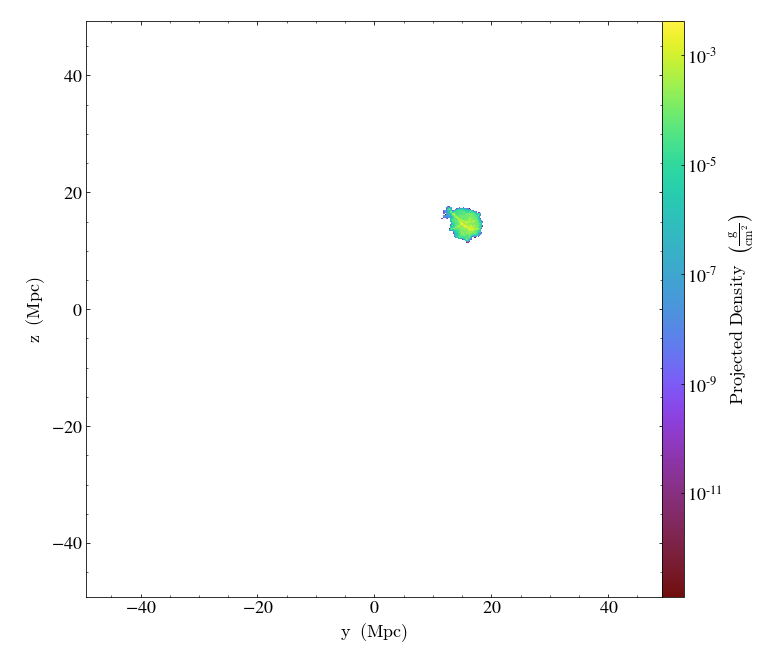

In [6]:
px = yt.ProjectionPlot(ds, 'x', ('gas', 'density'))
px.show()

yt : [INFO     ] 2021-03-08 23:32:55,401 Projection completed
yt : [INFO     ] 2021-03-08 23:32:55,404 xlim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-08 23:32:55,405 ylim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-08 23:32:55,407 xlim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-08 23:32:55,407 ylim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-08 23:32:55,409 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallba


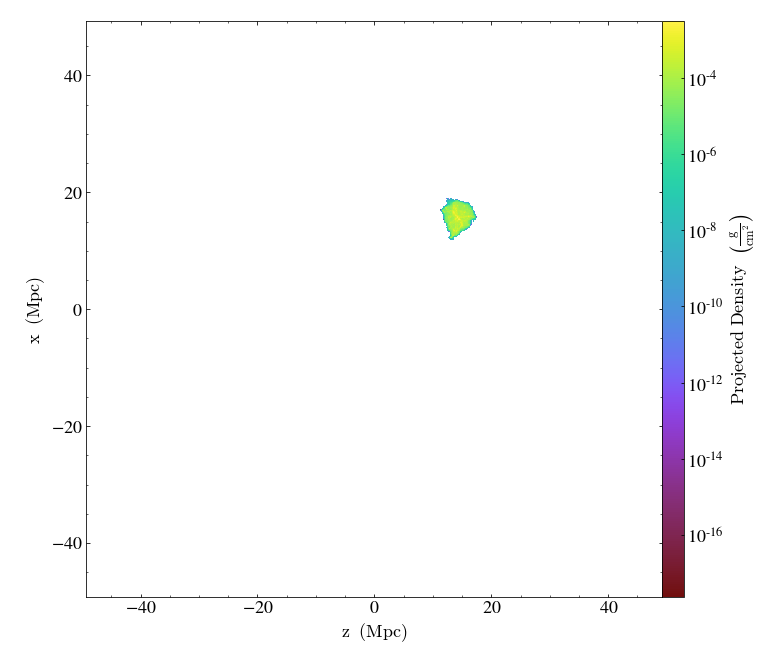

In [16]:
px = yt.ProjectionPlot(ds, 'y', ('gas', 'density'))
px.show()

In [18]:
ad = ds.all_data()

# total_mass returns a list, representing the total gas and dark matter + stellar mass, respectively
# print ([tm.in_units('Msun') for tm in ad.quantities.total_mass()])

In [19]:
density = ad[("PartType0","density")]
wdens = np.where(density == np.max(density))
coordinates = ad[("PartType0","Coordinates")]
center = coordinates[wdens][0]
print ('center = ',center)

center =  [31995.63476562 31473.6640625  28969.88671875] code_length


In [25]:
density

YTArray([2.04462776e-06, 8.54482369e-06, 1.31142706e-05, ...,
         1.41525625e-09, 9.78657932e-10, 4.72664186e-10]) code_mass/code_length**3

In [26]:
new_box_size = ds.quan(250,'code_length')

left_edge = center - new_box_size/2
right_edge = center + new_box_size/2

print (new_box_size.in_units('Mpc'))
print (left_edge.in_units('Mpc'))
print (right_edge.in_units('Mpc'))

0.12315295332038367 Mpc
[15.69985118 15.44272225 14.20933195] Mpc
[15.82300414 15.5658752  14.3324849 ] Mpc


yt : [INFO     ] 2021-03-08 23:41:51,473 Projection completed
yt : [INFO     ] 2021-03-08 23:41:51,475 xlim = 31411.164062 31536.164062
yt : [INFO     ] 2021-03-08 23:41:51,476 ylim = 28907.386719 29032.386719
yt : [INFO     ] 2021-03-08 23:41:51,477 xlim = 31411.164062 31536.164062
yt : [INFO     ] 2021-03-08 23:41:51,478 ylim = 28907.386719 29032.386719
yt : [INFO     ] 2021-03-08 23:41:51,480 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' in


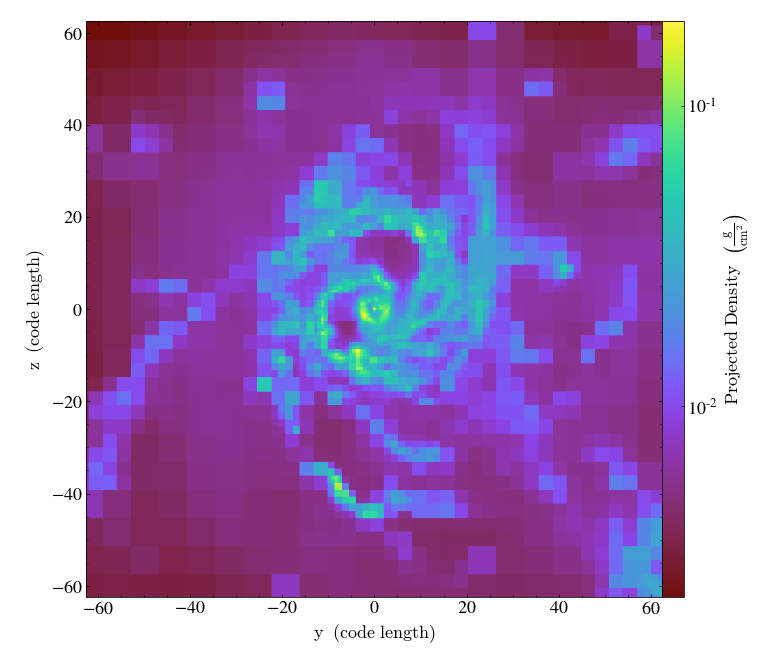

In [27]:
px = yt.ProjectionPlot(ds, 'x', ('gas', 'density'), center=center, width=new_box_size/2)
px.show()

In [31]:
ad[('all','Coordinates')].shape

(11907080, 3)

In [35]:
ad[('PartType0','Coordinates')].shape

(4334546, 3)

In [43]:
ad[('PartType1','Coordinates')].shape

(4786616, 3)

In [79]:
# fname = f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/r1/snaps/snapdir_{i:03d}/snapshot_{i:03d}.0.hdf5"

# unit_base = {'UnitLength_in_cm'         : 3.08568e+24,
#              'UnitMass_in_g'            :   1.989e+24,
#              'UnitVelocity_in_cm_per_s' :      100000}

# bbox_lim = 150 #kpc

# bbox = [[-bbox_lim,bbox_lim],
#         [-bbox_lim,bbox_lim],
#         [-bbox_lim,bbox_lim]]
 
# ds = yt.load(fname,unit_base=unit_base,bounding_box=bbox)
# ds.index
# ad= ds.all_data()

In [80]:
# px = yt.ProjectionPlot(ds, 'x',  ('all', 'Coordinates'))
# px

In [81]:
# px.show()

In [82]:
ds.field_list

[('PartType0', 'ArtificialViscosity'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'Density'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'InternalEnergy'),
 ('PartType0', 'Masses'),
 ('PartType0', 'Metallicity_00'),
 ('PartType0', 'Metallicity_01'),
 ('PartType0', 'Metallicity_02'),
 ('PartType0', 'Metallicity_03'),
 ('PartType0', 'Metallicity_04'),
 ('PartType0', 'Metallicity_05'),
 ('PartType0', 'Metallicity_06'),
 ('PartType0', 'Metallicity_07'),
 ('PartType0', 'Metallicity_08'),
 ('PartType0', 'Metallicity_09'),
 ('PartType0', 'Metallicity_10'),
 ('PartType0', 'Metallicity_11'),
 ('PartType0', 'NeutralHydrogenAbundance'),
 ('PartType0', 'ParticleIDs'),
 ('PartType0', 'SmoothingLength'),
 ('PartType0', 'StarFormationRate'),
 ('PartType0', 'Velocities'),
 ('PartType1', 'Coordinates'),
 ('PartType1', 'Masses'),
 ('PartType1', 'ParticleIDs'),
 ('PartType1', 'Velocities'),
 ('PartType2', 'Coordinates'),
 ('PartType2', 'Masses'),
 ('PartType2', 'ParticleIDs'),
 ('PartType2', 

In [25]:
ad[('PartType1', 'Coordinates')].shape

(16777215, 3)

In [26]:
16777215**(1/3)

255.9999949137368

In [50]:
px = yt.ParticleProjectionPlot(ds, 'y', ('PartType0', 'density'))

yt : [INFO     ] 2021-03-09 00:09:13,313 xlim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-09 00:09:13,314 ylim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-09 00:09:13,315 xlim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-09 00:09:13,316 ylim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-09 00:09:13,317 Splatting (('PartType0', 'density')) onto a 800 by 800 mesh


/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]



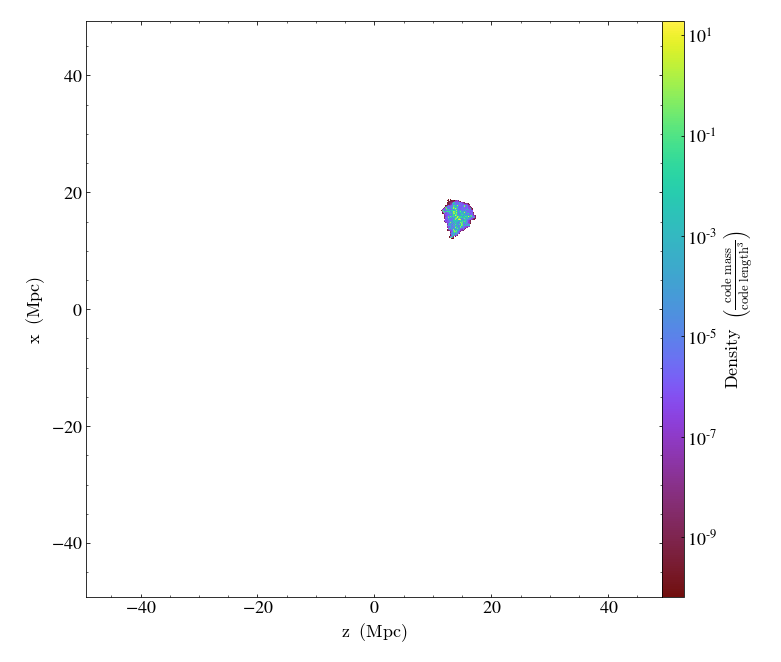

In [51]:
px.show()

yt : [INFO     ] 2021-03-09 14:14:42,766 xlim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-09 14:14:42,768 ylim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-09 14:14:42,770 xlim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-09 14:14:42,771 ylim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-09 14:14:42,773 Splatting (('PartType0', 'particle_mass')) onto a 800 by 800 mesh
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/mnt/home/student/cp


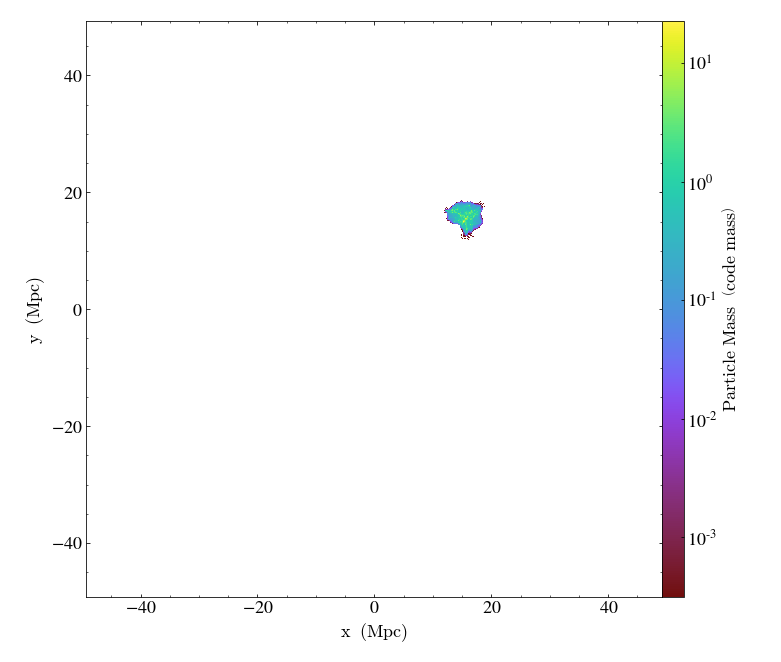

In [74]:
px = yt.ParticlePlot(ds, ('PartType0', 'particle_position_x'), ('PartType0', 'particle_position_y'), ('PartType0', 'particle_mass'))
px.show()

yt : [INFO     ] 2021-03-09 14:30:06,213 xlim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-09 14:30:06,214 ylim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-09 14:30:06,216 xlim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-09 14:30:06,216 ylim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-09 14:30:06,237 Splatting (('PartType1', 'particle_mass')) onto a 800 by 800 mesh
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/mnt/home/student/cp


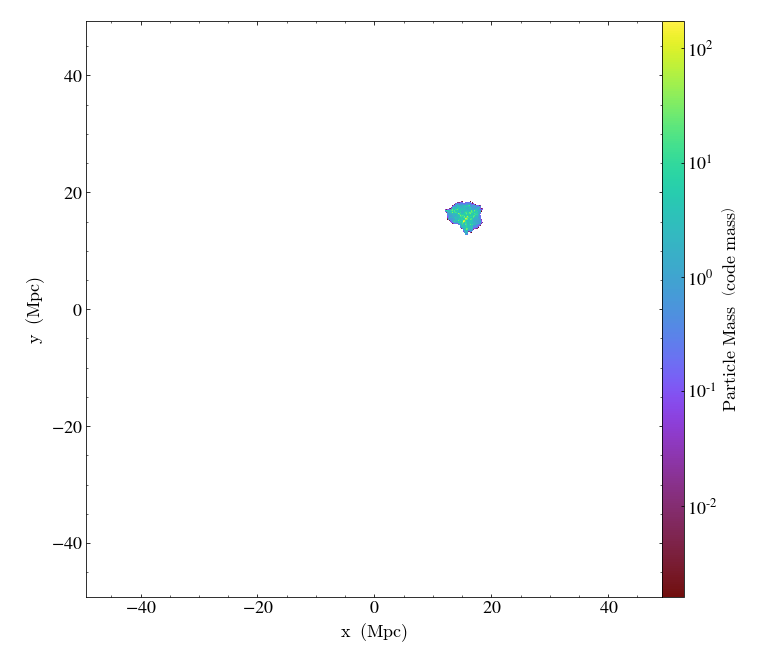

In [75]:
px = yt.ParticlePlot(ds, ('PartType1', 'particle_position_x'), ('PartType1', 'particle_position_y'), ('PartType1', 'particle_mass'))
px.show()

yt : [INFO     ] 2021-03-09 14:35:20,612 Projection completed
yt : [INFO     ] 2021-03-09 14:35:20,615 xlim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-09 14:35:20,616 ylim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-09 14:35:20,617 xlim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-09 14:35:20,618 ylim = -100000.000000 100000.000000
yt : [INFO     ] 2021-03-09 14:35:20,619 Making a fixed resolution buffer of (('deposit', 'PartType0_density')) 800 by 800
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'm


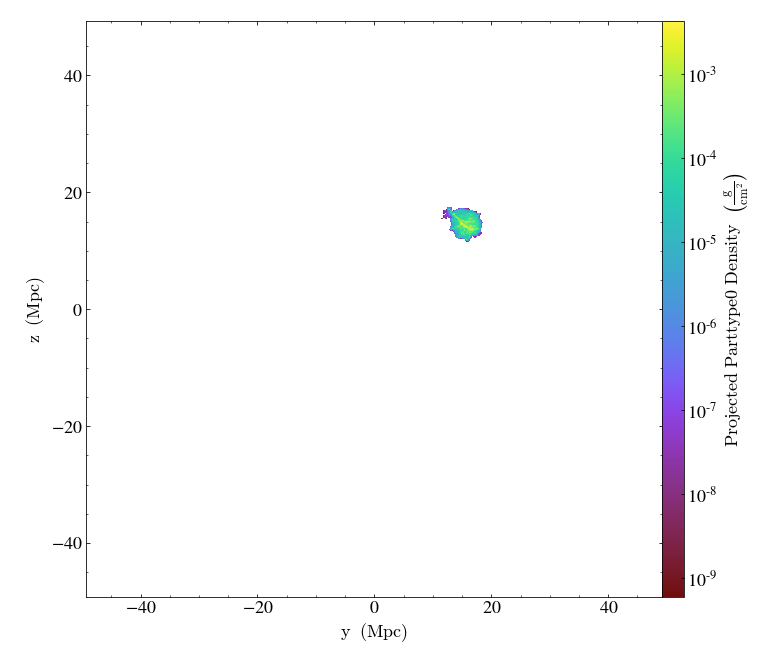

In [77]:
px = yt.ProjectionPlot(ds, 'x', ('deposit', 'PartType0_density'))
px.show()

In [55]:
13003638/3

4334546.0

In [71]:
ad[('PartType1', 'Coordinates')][:,0].shape

(4786616,)

In [67]:
ad[('all', 'Coordinates')]

(11907080, 3)

In [78]:
# ad[('gas', 'density')]